# Demo 1 - Customizing OpenAI GPT-3 for Diverse Language Tasks

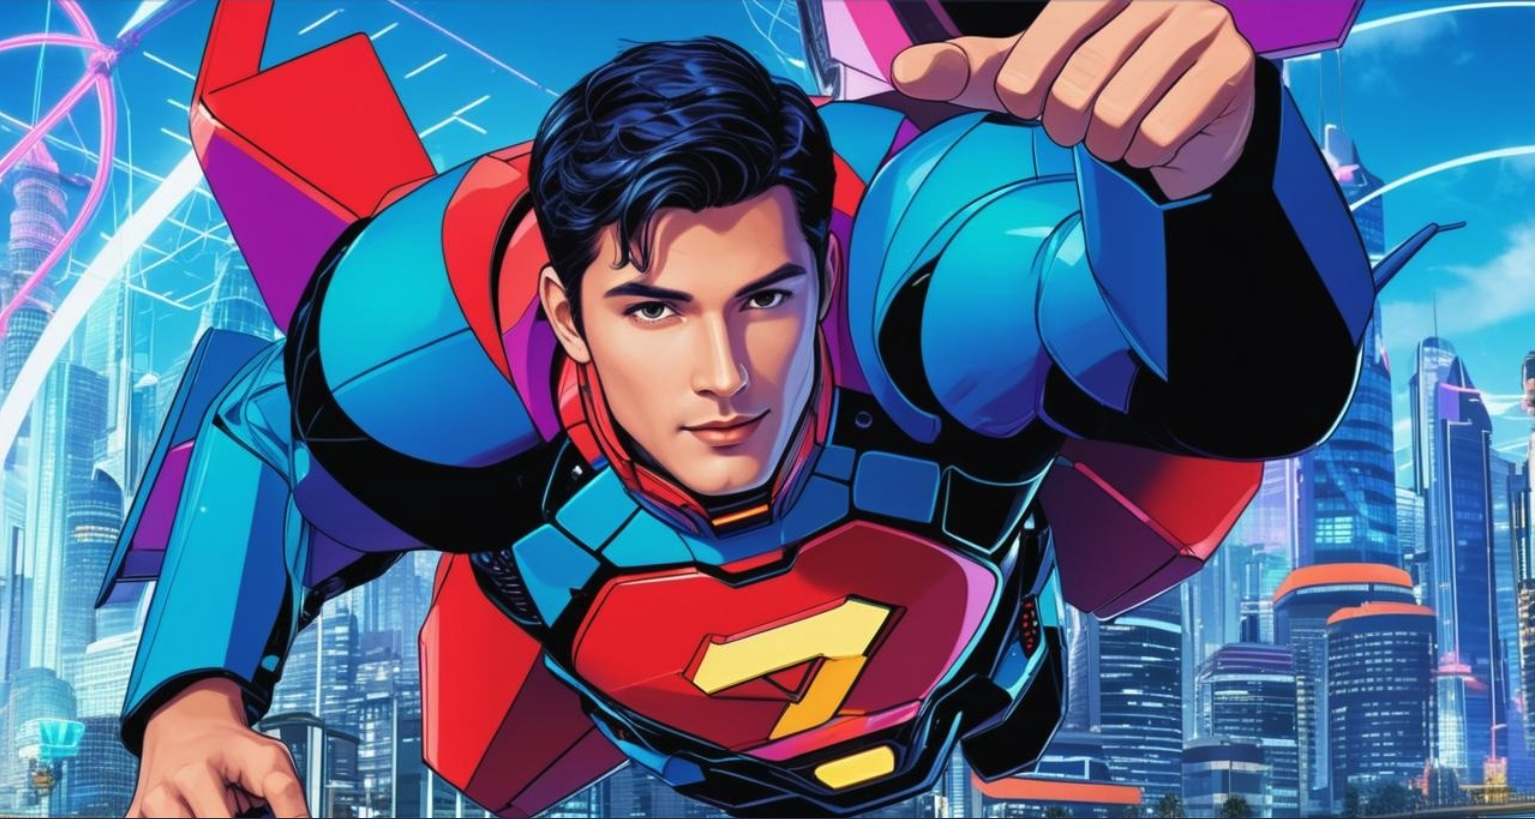

## Introduction
This lab focuses on demonstrating prompt engineering techniques using Azure OpenAI. Prompt engineering is a critical aspect of utilizing OpenAI models effectively, as it involves crafting prompts that generate desired outputs. In this lab, we will cover various scenarios, including QnA, summarizing text, classifying text, generating new product names, translation, parsing unstructured data, and translating natural language queries into SQL queries.

## Prerequisites
 - Ensure you have an Azure OpenAI account.
 - Install the required libraries: `openai` and `python-dotenv`.

In [ ]:
!pip install openai==0.28.0

In [ ]:
import openai
import os
import sys

from dotenv import load_dotenv

In [ ]:
sys.version

'3.10.9 (v3.10.9:1dd9be6584, Dec  6 2022, 14:37:36) [Clang 13.0.0 (clang-1300.0.29.30)]'

In [ ]:
print("openai version =", openai.__version__)

openai version = 0.28.0


Create an Azure OpenAI API key and set up your environment variables. Create a file named `azure.env` with the following content:

In [ ]:
load_dotenv("azure.env")

openai.api_type: str = "azure"
openai.api_key = os.getenv("AZURE_OPENAI_API_KEY")
openai.api_base = os.getenv("AZURE_OPENAI_ENDPOINT")
openai.api_version = os.getenv("OPENAI_API_VERSION")

In [ ]:
model = "genaicourse"

## Prompt Engineering

### 1. QnA
In this section, we will use Azure OpenAI to answer questions.

The primary goal of this section is to showcase how the model can understand and generate meaningful responses based on the given input.

In [ ]:
prompt = """Who are you?"""

results = openai.ChatCompletion.create(
    engine=model,
    messages=[
        {"role": "system", "content": "You are a helpful assistant."},
        {"role": "user", "content": prompt}
    ],
    temperature=0.7,  # You can adjust the temperature for more creative or focused outputs
    max_tokens=50  # Increase max_tokens for longer responses
)

output_text = results["choices"][0]["message"]["content"].strip("\n")
print(output_text)


I am an AI language model designed to assist and communicate with users. How can I help you today?


### Explanation

1.  **Prompt Definition:** The variable `prompt` contains the question provided to the model. In this case, the question is "Who are you?"
    
2.  **API Call:** The `openai.Completion.create` function is used to send a request to the OpenAI GPT-3.5 API. It takes parameters such as the engine (model), the prompt (question), temperature, and max_tokens (maximum number of tokens in the response).
    
3.  **Response Handling:** The API response is stored in the `results` variable, and the generated text is extracted from it using `results["choices"][0]["text"]`. The `strip("\n")` function is used to remove leading and trailing newline characters.
    
4.  **Output Printing:** The final generated text is printed to the console using `print(results["choices"][0]["text"].strip("\n"))`.
    

### Purpose

-   **Demonstrating Question Understanding:** This section serves to illustrate how the OpenAI GPT-3.5 model can comprehend and respond appropriately to a given question. The model attempts to provide a coherent answer based on its understanding of the input prompt.
    
-   **Interaction with the Model:** It showcases the basic interaction pattern with the OpenAI API for question and answer tasks, emphasizing the simplicity of the API integration for such scenarios.
    
-   **User-Specific Applications:** This functionality is valuable for a range of applications, including chatbots, virtual assistants, and information retrieval systems where users can pose questions, and the system generates relevant responses.
    
-   **Flexibility in Questioning:** The model's ability to handle various types of questions and provide contextually relevant answers highlights its versatility in natural language understanding.
    
    

> ### Note
>
> Depending on the nature of the prompt and the desired application, additional parameters such as temperature (controls randomness in the model's output) and max_tokens (limits the length of the response) can be adjusted to fine-tune the behavior of the model.

Generate text in French based on a simple prompt.

In [ ]:
prompt = """Bonjour"""

results = openai.ChatCompletion.create(
    engine=model,
    messages=[
        {"role": "system", "content": "You are a helpful assistant."},
        {"role": "user", "content": prompt}
    ],
    temperature=0.7,  # You can adjust the temperature for more creative or focused outputs
    max_tokens=50  # Increase max_tokens for longer responses
)

output_text = results["choices"][0]["message"]["content"].strip("\n")
print(output_text)


Bonjour! Comment puis-je vous aider aujourd'hui?


### Explanation

1.  **Prompt Definition:** The variable `prompt` contains a French greeting, "Bonjour," which translates to "Hello" in English.
    
2.  **API Call:** The `openai.Completion.create` function is used to send a request to the OpenAI GPT-3.5 API. The parameters include:
    
    -   `engine`: Specifies the model to use (`text-davinci-003` in this case).
    -   `prompt`: The input text provided to the model (`"Bonjour"` in French).
    -   `temperature`: Controls the randomness of the model's output (set to `0` for deterministic responses).
    -   `max_tokens`: Limits the length of the generated text to 800 tokens.
3.  **Response Handling:** The API response is stored in the `results` variable. The generated text is then extracted using `results["choices"][0]["text"]`. The `strip("\n")` function is used to remove leading and trailing newline characters.
    
4.  **Output Printing:** The final generated text is printed to the console using `print(results["choices"][0]["text"].strip("\n"))`.
    

### Purpose

-   **Language Translation:** This code snippet demonstrates the model's ability to understand and respond in French. It can be used for language translation tasks where the model takes input in one language and generates corresponding output in another language.
    
-   **Multilingual Capabilities:** GPT-3.5's multilingual capabilities allow it to handle prompts in various languages, showcasing its versatility in natural language understanding and generation.
    
-   **User Interface Localization:** In applications with multilingual user interfaces, this capability can be employed to dynamically generate responses in the user's preferred language.
    

> ### Note
>
> -   The choice of the `temperature` parameter influences the randomness of the model's responses. A lower temperature value (e.g., 0) produces more deterministic and focused output, while higher values  introduce more randomness.
>
> -   Adjustments to the `max_tokens` parameter can be made based on the desired length of the generated text. Setting an appropriate value prevents overly long responses.
>     
> -   This code illustrates how GPT-3.5 can seamlessly handle prompts in different languages, showcasing its potential in internationalization and localization contexts.


### 2. Summarize Text

Model's ability to summarize a given text into three short bullet points.

In [ ]:
prompt = """Summarize below text in 3 short bullet points：

            ###
            A neutron star is the collapsed core of a massive supergiant star,
            which had a total mass of between 10 and 25 solar masses,
            possibly more if the star was especially metal-rich.
            Neutron stars are the smallest and densest stellar objects,
            excluding black holes and hypothetical white holes, quark stars,
            and strange stars. Neutron stars have a radius on the order of
            10 kilometres (6.2 mi) and a mass of about 1.4 solar masses.
            They result from the supernova explosion of a massive star,
            combined with gravitational collapse, that compresses the core
            past white dwarf star density to that of atomic nuclei.
            ###
         """

results = openai.ChatCompletion.create(
    engine=model,
    messages=[
        {"role": "system", "content": "You are a helpful assistant."},
        {"role": "user", "content": prompt}
    ],
    temperature=0.7,  # You can adjust the temperature for more creative or focused outputs
    max_tokens=800  # Increase max_tokens for longer responses
)

output_text = results["choices"][0]["message"]["content"].strip("\n")
print(output_text)


- Neutron stars are the collapsed core of massive supergiant stars
- They are small and dense with a radius of around 10km and a mass of 1.4 solar masses
- They form from supernova explosions and gravitational collapse


### Explanation

1.  **Prompt Definition:**
    
    -   The variable `prompt` contains a lengthy text describing neutron stars. The prompt instructs the model to summarize this text into three short bullet points.
2.  **API Call:**
    
    -   The `openai.Completion.create` function is used to send a request to the OpenAI GPT-3.5 API.
    -   The `engine` parameter specifies the GPT-3.5 engine or model to be used.
    -   The `prompt` parameter provides the input text (description of a neutron star) to the model.
    -   The `temperature` parameter is set to 0, indicating that the model's output should be deterministic and focused.
    -   The `max_tokens` parameter limits the length of the generated text to 800 tokens.
3.  **Response Handling:**
    
    -   The API response, including the generated text, is stored in the `results` variable.
4.  **Output Printing:**
    
    -   The generated summary text is extracted from the API response using `results["choices"][0]["text"].strip("\n")`.
    -   The `strip("\n")` function removes leading and trailing newline characters.
    -   The final result is printed to the console.

### Purpose

-   **Text Summarization:**
    
    -   The primary purpose is to showcase the model's ability to condense a longer piece of text into a concise summary, represented as three short bullet points.
-   **Information Extraction:**
    
    -   It demonstrates how the model can extract key information from a given passage and present it in a structured format, which is particularly useful for distilling essential details from large bodies of text.
-   **Automation of Summary Generation:**
    
    -   Developers can use this code as a foundation for automating the process of summarizing documents or articles, streamlining information extraction tasks.
-   **Scalable Content Processing:**
    
    -   This functionality is valuable in scenarios where there is a need to process and summarize large volumes of textual information efficiently.

> ### Note
>
> -   Developers can experiment with different prompts, text lengths, and temperature settings to fine-tune the summarization process based on their specific use case requirements.
>     
> -   This code snippet illustrates how the OpenAI GPT-3.5 model can be leveraged for content summarization, offering a glimpse into its capabilities in handling natural language understanding and generation  tasks.


### Chinese Text Summarization

The provided code snippet focuses on leveraging the OpenAI GPT-3.5 model to generate a brief summary of a Chinese text. The text in question describes the characteristics of a neutron star, including its mass, size, and the process by which it is formed. The goal is to obtain a concise summary represented in simplified Chinese.

In [ ]:
prompt = """简要概括下面文字：

            ###
            中子星是一颗质量达10至25太阳质量（如果恒星特别富含金属可能更多）的超级巨星的坍缩核心。
            中子星是最小最密集的恒星物体，除了黑洞和假想的白洞、夸克星和奇异星。
            中子星的半径约为10公里（6.2英里），质量约为1.4太阳质量。
            它们是由超级新星爆炸和引力坍缩共同产生的，使核心压缩到白矮星密度以上的原子核密度。
            ###
         """

results = openai.ChatCompletion.create(
    engine=model,
    messages=[
        {"role": "system", "content": "You are a helpful assistant."},
        {"role": "user", "content": prompt}
    ],
    temperature=0,  # You can adjust the temperature for more creative or focused outputs
    max_tokens=800  # Increase max_tokens for longer responses
)

output_text = results["choices"][0]["message"]["content"].strip("\n")
print(output_text)


中子星是一种质量达10至25太阳质量的超级巨星的坍缩核心，是最小最密集的恒星物体之一，半径约为10公里，质量约为1.4太阳质量。它们是由超级新星爆炸和引力坍缩共同产生的，使核心压缩到白矮星密度以上的原子核密度。



#### Explanation

1.  **Prompt Definition:**
    
    -   The variable `prompt` contains a Chinese passage instructing the model to summarize the provided text.
2.  **API Call:**
    
    -   The `openai.Completion.create` function is used to send a request to the OpenAI GPT-3.5 API.
    -   The `engine` parameter specifies the GPT-3.5 engine or model to be used.
    -   The `prompt` parameter provides the input text (description of a neutron star in Chinese) to the model.
    -   The `temperature` parameter is set to 0, indicating that the model's output should be deterministic and focused.
    -   The `max_tokens` parameter limits the length of the generated text to 800 tokens.
3.  **Response Handling:**
    
    -   The API response, including the generated summary text, is stored in the `results` variable.
4.  **Output Printing:**
    
    -   The generated summary text is extracted from the API response using `results["choices"][0]["text"].strip("\n")`.
    -   The `strip("\n")` function removes leading and trailing newline characters.
    -   The final result is printed to the console.

#### Purpose

-   **Cross-Language Summarization:**
    
    -   This code exemplifies the OpenAI GPT-3.5 model's capability to summarize information in a language other than English, showcasing its multilingual text processing capabilities.
-   **Automated Content Summarization:**
    
    -   It illustrates how the model can be used to automate the process of summarizing content in Chinese, providing a concise overview of a given text.
-   **Language Understanding and Generation:**
    
    -   The code demonstrates the model's proficiency in understanding and generating text in a non-English language, extending its utility to a global context.

#### Note

-   Developers can adapt this code for various applications, such as building multilingual summarization tools or integrating cross-language capabilities into their natural language processing workflows.
    
-   Adjustments to the prompt, temperature, and other parameters can be made based on specific use case requirements and language nuances.

### 3. Classify Text

`Classify Text` refers to the task of assigning predefined categories or labels to a given piece of text based on its content and context. The goal is to automatically categorize the text into one or more predefined classes, making it easier to organize, search, and analyze large volumes of textual data. This task falls under the broader field of natural language processing (NLP) and is commonly used in various applications, including sentiment analysis, topic categorization, and content filtering.

The process typically involves training a machine learning model on a labeled dataset where each text sample is associated with its corresponding category. The model learns patterns and features from the training data, allowing it to generalize and classify new, unseen text accurately.

In the context of the provided code snippet, "Classify Text" specifically refers to instructing the OpenAI GPT-3.5 model to categorize a news article into one of the specified categories: Tech, Politics, Sport, or Entertainment. The model generates a response that represents its prediction of the most suitable category based on its understanding of the given news article

In [ ]:
prompt = """Classify the following news article into 1 of the following categories:
            [Tech, Politics, Sport, Entertainment]

            ###
            Donna Steffensen Is Cooking Up a New Kind of Perfection.
            The Internet’s most beloved cooking guru has a buzzy new book and
            a fresh new perspective:
            ###
         """

results = openai.ChatCompletion.create(
    engine=model,
    messages=[
        {"role": "system", "content": "You are a helpful assistant."},
        {"role": "user", "content": prompt}
    ],
    temperature=0.7,  # You can adjust the temperature for more creative or focused outputs
    max_tokens=800  # Increase max_tokens for longer responses
)

output_text = results["choices"][0]["message"]["content"].strip("\n")
print(output_text)


Entertainment.


#### Description

1.  **Prompt Definition:**
    
    -   The `prompt` variable sets the instructions for the model. It instructs the model to classify the provided news article into one of the predefined categories: Tech, Politics, Sport, or Entertainment.
2.  **News Article:**
    
    -   The provided news article is about Donna Steffensen, described as a cooking guru with a new book and a fresh perspective.
3.  **API Call:**
    
    -   The `openai.Completion.create` function sends a request to the OpenAI GPT-3.5 API for text generation.
    -   The `engine` parameter specifies the GPT-3.5 engine or model to be used.
    -   The `prompt` parameter supplies the input text (news article and classification instruction) to the model.
    -   The `temperature` parameter is set to 0, indicating a deterministic response without randomness.
    -   The `max_tokens` parameter limits the length of the generated text to 800 tokens.
4.  **Response Handling:**
    
    -   The API response, including the generated text (classification result), is stored in the `results` variable.
5.  **Output Printing:**
    
    -   The generated classification result is extracted from the API response using `results["choices"][0]["text"].strip("\n")`.
    -   The `strip("\n")` function removes leading and trailing newline characters.
    -   The final result is printed to the console.

#### Purpose

-   **Text Classification:**
    
    -   The code demonstrates the use of the OpenAI GPT-3.5 model for text classification. The model categorizes a given news article into one of the specified classes (Tech, Politics, Sport, or Entertainment).
-   **Automated Categorization:**
    
    -   It showcases the potential for automating the categorization of news articles based on their content, providing a quick and efficient way to organize information.
-   **Understanding Context:**
    
    -   The model's ability to comprehend the context of the news article and assign it to a relevant category highlights its proficiency in understanding natural language and context.

#### Note

-   Developers can customize the prompt and categories based on their specific use case, expanding the application to various domains that involve text classification.
    
-   Fine-tuning the parameters, such as temperature, can be explored to influence the randomness and creativity of the generated classification result.

### 4. Generate New Product Name

It automatically create a unique product name based on specified information. With a product description of a "home milkshake maker" and seed words like "fast, healthy, compact," the model generates a fitting name inspired by provided examples. This showcases the capability of the model in creative product naming, offering a streamlined and automated approach for inventing distinctive names for various products.

In [ ]:
prompt = """Generate new product name based on the following information：

            ###
            Product description: A home milkshake maker
            Seed words: fast, healthy, compact
            Product names: HomeShaker, Fit Shaker, QuickShake, Shake Maker
            ###
         """

results = openai.ChatCompletion.create(
    engine=model,
    messages=[
        {"role": "system", "content": "You are a helpful assistant."},
        {"role": "user", "content": prompt}
    ],
    temperature=0.7,  # You can adjust the temperature for more creative or focused outputs
    max_tokens=800  # Increase max_tokens for longer responses
)

output_text = results["choices"][0]["message"]["content"].strip("\n")
print(output_text)


Based on the provided information, I would suggest the following product names:

1. SpeedyBlend
2. HealthShake
3. CompactMix
4. FastShake Pro
5. NutriShaker
6. QuickBlend
7. SlimShaker
8. FitBlend
9. MiniMixer
10. ShakeMate

I hope that helps!


### 5. Translation

In "Translation" you translate a Chinese poem into English. The provided poem describes the scenery of mountains, the flow of the Yellow River into the sea, and the desire to explore distant landscapes. The model generates an English translation, showcasing its ability to understand and convert text between different languages. The resulting translation is then printed to the console, demonstrating the model's proficiency in cross-language tasks.

In [ ]:
prompt = """请用英语翻译下面这首诗歌：

            ###
            白日依山尽，黄河入海流。
            欲穷千里目，更上一层楼。
            ###
         """

results = openai.ChatCompletion.create(
    engine=model,
    messages=[
        {"role": "system", "content": "You are a helpful assistant."},
        {"role": "user", "content": prompt}
    ],
    temperature=0.7,  # You can adjust the temperature for more creative or focused outputs
    max_tokens=800  # Increase max_tokens for longer responses
)

output_text = results["choices"][0]["message"]["content"].strip("\n")
print(output_text)


Here's the English translation of the poem:

The sun sets behind the mountains,
The Yellow River flows into the sea.
To see a thousand miles, one must climb higher,
And ascend another level of the tower.


### 6. Parse Unstructured Data

In "Parse Unstructured Data" you process information about fruits on the fictional planet Goocrux. Descriptions of various fruits, such as neoskizzles, loheckles, pounits, loopnovas, and glowls, are provided. The code instructs the model to create a structured table summarizing these fruits, including details like color and flavor. The resulting table is generated by the model and printed to the console, showcasing the model's ability to organize and present information in a tabular format based on unstructured input.

In [ ]:
prompt = """There are many fruits that were found on the recently discovered planet Goocrux.
            There are neoskizzles that grow there, which are purple and taste like candy.
            There are also loheckles, which are a grayish blue fruit and are very tart, a
            little bit like a lemon. Pounits are a bright green color and are more savory
            than sweet. There are also plenty of loopnovas which are a neon pink flavor and
            taste like cotton candy. Finally, there are fruits called glowls, which have a very
            sour and bitter taste which is acidic and caustic, and a pale orange tinge to them.

            ###
            Please make a table summarizing the fruits from Goocrux
            | Fruit | Color | Flavor |
            ###
         """

results = openai.ChatCompletion.create(
    engine=model,
    messages=[
        {"role": "system", "content": "You are a helpful assistant."},
        {"role": "user", "content": prompt}
    ],
    temperature=0.7,  # You can adjust the temperature for more creative or focused outputs
    max_tokens=800  # Increase max_tokens for longer responses
)

output_text = results["choices"][0]["message"]["content"].strip("\n")
print(output_text)


| Fruit     | Color        | Flavor          |
|-----------|--------------|----------------|
| Neoskizzles | Purple       | Candy-like      |
| Loheckles  | Grayish blue | Tart like lemon |
| Pounits    | Bright green | Savory         |
| Loopnovas  | Neon pink    | Cotton candy    |
| Glowls     | Pale orange  | Sour and bitter|


### 7. NLP to SQL

In "NLP to SQL" you convert natural language instructions into a SQL query. The provided prompt defines three PostgreSQL tables (Employee, Department, and Salary_Payments) with their respective properties. The code then instructs the model to generate a SQL query for listing the names of departments that employed more than 10 employees in the last 3 months.

The resulting SQL query is generated by the model and printed to the console, showcasing the model's ability to understand and convert natural language queries into structured SQL statements for database operations. This code provides an example of how natural language processing can be applied to automate the generation of SQL queries based on human-readable instructions.

In [ ]:
prompt = """### Postgres SQL tables, with their properties:
            #
            # Employee(id, name, department_id)
            # Department(id, name, address)
            # Salary_Payments(id, employee_id, amount, date)
            #

            ### A query to list the names of the departments
                which employed more than 10 employees in the last 3 months
            ###
         """

results = openai.ChatCompletion.create(
    engine=model,
    messages=[
        {"role": "system", "content": "You are a helpful assistant."},
        {"role": "user", "content": prompt}
    ],
    temperature=0.7,  # You can adjust the temperature for more creative or focused outputs
    max_tokens=800  # Increase max_tokens for longer responses
)

output_text = results["choices"][0]["message"]["content"].strip("\n")
print(output_text)


Here's a possible SQL query to list the names of the departments which employed more than 10 employees in the last 3 months:

```
SELECT d.name
FROM Department d
INNER JOIN Employee e ON d.id = e.department_id
INNER JOIN Salary_Payments sp ON e.id = sp.employee_id
WHERE sp.date >= NOW() - INTERVAL '3 months'
GROUP BY d.id, d.name
HAVING COUNT(DISTINCT e.id) > 10;
```

Explanation:

- We start by selecting the name column from the Department table, since that's what we want to display.
- We join the Department table with the Employee table on the department_id column, and then join the Salary_Payments table on the employee_id column, so that we can filter by the date of the payments.
- We use the WHERE clause to restrict the results to payments made in the last 3 months, by comparing the date column with the current date minus an interval of 3 months.
- We group the results by the department id and name, so that we can count the number of distinct employees per department.
- Finally, we